In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [7]:
x

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [8]:
x.shape

(1000, 2)

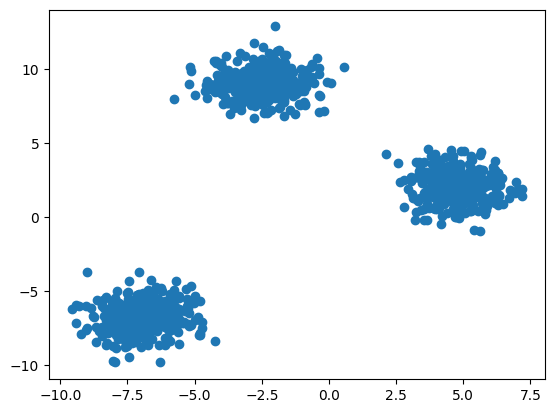

In [11]:
plt.scatter(x[:,0],x[:,1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
x_train.shape

(800, 2)

In [15]:
from sklearn.cluster import KMeans

In [16]:
#manual process

In [17]:
#Elbow method to select the k value
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [18]:
wcss

[52946.116849197184,
 15369.674523316218,
 1599.7085950090786,
 1404.060058308954,
 1224.8903436875935,
 1041.1826957823025,
 935.514473913737,
 824.2843116022711,
 719.8718757109641,
 659.5949191846458]

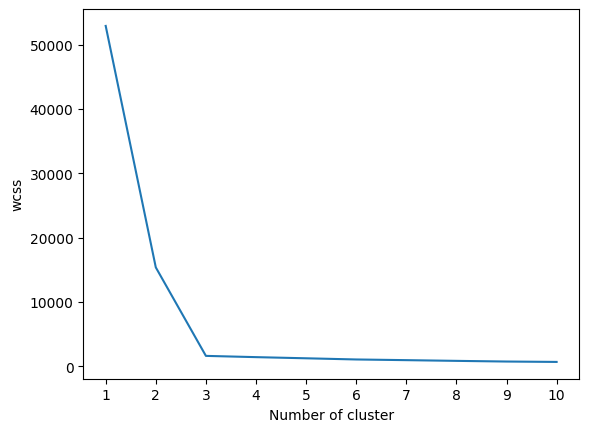

In [24]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()


In [25]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [26]:
y_label = kmeans.fit_predict(x_train)

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


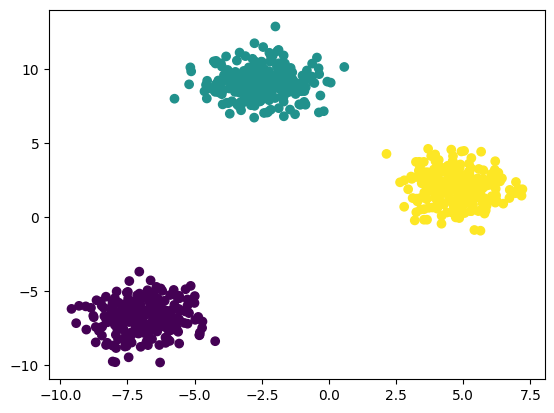

In [28]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [29]:
y_test_label = kmeans.predict(x_test)

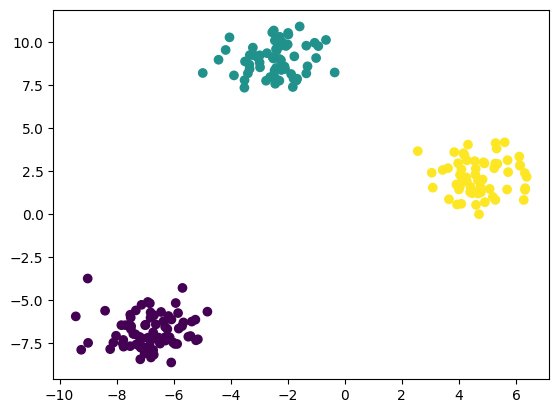

In [30]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

In [31]:
#Knee locator

In [32]:
pip install kneed

In [33]:
from kneed import KneeLocator

In [35]:
kl = KneeLocator(range(1,11),wcss,direction='decreasing',curve='convex')
kl.elbow

3

In [36]:
#Performace matrix

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score1 = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhouette_score1.append(score)


c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [40]:
silhouette_score1

[0.7006603070144354,
 0.8413954746484233,
 0.6705950916661025,
 0.5040762489449423,
 0.31784234621064816,
 0.3259747726081274,
 0.3281836088718103,
 0.32961507893941944,
 0.33185952712488176]

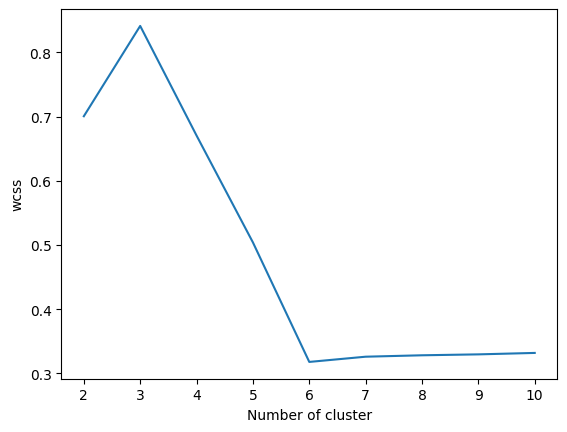

In [42]:
plt.plot(range(2,11),silhouette_score1)
plt.xticks(range(2,11))
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()
